In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [30]:
dataset = pd.read_csv('log2.csv')
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [31]:

dataset.shape

(65532, 12)

In [32]:
dataset.dropna()
     

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [33]:

dataset.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [34]:
Y=dataset['Action']
print(Y)

0        allow
1        allow
2        allow
3        allow
4        allow
         ...  
65527    allow
65528    allow
65529     drop
65530     drop
65531     drop
Name: Action, Length: 65532, dtype: object


In [35]:
dataset = dataset.drop(['Action'],axis=1)

In [36]:
X = dataset.iloc[:,0:-1]
print(X)


       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   
65531        54867               445                0                     0   

         Bytes  Bytes Sent  Bytes Received  Packets

In [37]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.51325629, -0.56993668,  1.60688158, ..., -0.01965064,
        -0.11847399, -0.01255093],
       [ 0.45006636, -0.38927922,  1.68293804, ..., -0.01633872,
        -0.16145495, -0.0097549 ],
       [-2.78658198,  2.15227224,  1.09155473, ..., -0.01965064,
         3.74650686, -0.01255093],
       ...,
       [ 0.35914891, -0.54870834, -0.87767476, ..., -0.01984546,
        -0.21766084, -0.01255093],
       [ 0.35908336, -0.54870834, -0.87767476, ..., -0.01984546,
        -0.21766084, -0.01255093],
       [ 0.35888671, -0.54870834, -0.87767476, ..., -0.01984546,
        -0.21766084, -0.01255093]])

In [39]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [40]:
samples

[(       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
  33284        16230                53            64249                    53   
  48767        56340                53            20646                    53   
  11570        64543               445                0                     0   
  8263         59683               443             7689                   443   
  12035        51997               443            19517                   443   
  ...            ...               ...              ...                   ...   
  45891        57470              9273            56118                  9273   
  52416        58470               445                0                     0   
  42613        53681             31466            64750                 31466   
  43567        56835             35894                0                     0   
  2732         50426               445                0                     0   
  
         Bytes  Bytes Sen

In [41]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [42]:
def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

In [43]:

for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.67 Best Kernel =  poly Best Nu =  8.65 Best Epsilon =  9.19
Best Accuracy =  0.83 Best Kernel =  linear Best Nu =  5.16 Best Epsilon =  2.88
Best Accuracy =  0.64 Best Kernel =  rbf Best Nu =  7.14 Best Epsilon =  4.48
Best Accuracy =  0.84 Best Kernel =  poly Best Nu =  1.32 Best Epsilon =  6.0
Best Accuracy =  0.67 Best Kernel =  rbf Best Nu =  8.0 Best Epsilon =  0.86
Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  3.79 Best Epsilon =  4.29
Best Accuracy =  0.59 Best Kernel =  linear Best Nu =  6.78 Best Epsilon =  9.04
Best Accuracy =  0.66 Best Kernel =  rbf Best Nu =  7.34 Best Epsilon =  7.31
Best Accuracy =  0.81 Best Kernel =  poly Best Nu =  1.58 Best Epsilon =  2.83
Best Accuracy =  0.84 Best Kernel =  linear Best Nu =  9.99 Best Epsilon =  6.31


In [44]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.67,poly,8.65,9.19
1,2,0.83,linear,5.16,2.88
2,3,0.64,rbf,7.14,4.48
3,4,0.84,poly,1.32,6.00
4,5,0.67,rbf,8.00,0.86
5,6,0.67,linear,3.79,4.29
6,7,0.59,linear,6.78,9.04
7,8,0.66,rbf,7.34,7.31
8,9,0.81,poly,1.58,2.83
9,10,0.84,linear,9.99,6.31


In [45]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [46]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [47]:
train_sizes

array([  412,  1246,  2081,  2915,  3749,  4583,  5417,  6251,  7085,
        7919,  8753,  9587, 10422, 11256, 12090, 12924, 13758, 14592,
       15426, 16260, 17094, 17929, 18763, 19597, 20431, 21265, 22099,
       22933, 23767, 24601, 25435, 26270, 27104, 27938, 28772, 29606,
       30440, 31274, 32108, 32942, 33777, 34611, 35445, 36279, 37113,
       37947, 38781, 39615, 40449, 41284])

In [48]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

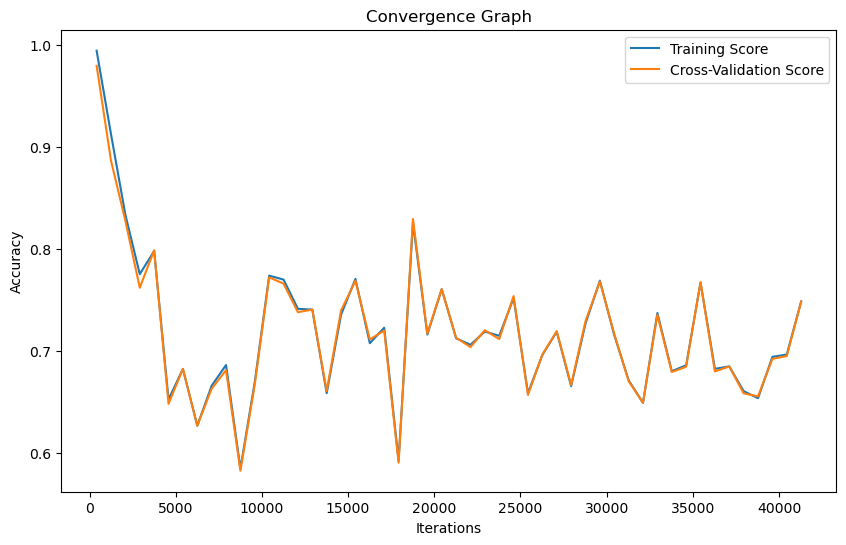

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()